<a href="https://colab.research.google.com/github/prog815/portfOptim/blob/master/%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%BE%D0%B3%D0%BE_%D0%BF%D0%BE%D1%80%D1%82%D1%84%D0%B5%D0%BB%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проверка простого портфеля

Проект "Оптимизация инвестиционного портфеля".

https://github.com/prog815/portfOptim

Енин А.В.

Оренбург - 2020

10.09.2020

Проверяем метод оптимизации на длительном периоде.

В предыдущих экспериментах [Оптимизация инвестиционного портфеля по методу Марковица](https://github.com/prog815/portfOptim/blob/master/%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%BE%D0%B9_%D0%BF%D0%BE%D1%80%D1%82%D1%84%D0%B5%D0%BB%D1%8C.ipynb) и [Оптимизация инвестиционного портфеля по методу Марковица (с библиотекой)](https://github.com/prog815/portfOptim/blob/master/%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%BE%D0%B9_%D0%BF%D0%BE%D1%80%D1%82%D1%84%D0%B5%D0%BB%D1%8C_(%D1%81_%D0%B1%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%BE%D0%B9.ipynb) отработали технологию получения оптимального портфеля и оформили это в виде библиотеки для удобного использования.

В настоящем эксперименте будем смотреть применение на длительном временном участке применение данной технолгии.

## Опубликовано

Опубликовано на [GitHub](), [VC](), [Google.Docs](), [Habr](), [VK](), [OK](), [FB](), [Telegram]()

# Загрузка данных по котировкам
Используем данные с сервиса [Yahoo.Finance](https://finance.yahoo.com/most-active)

In [ ]:
! pip install yfinance

In [ ]:
import yfinance as yf

Берем несколько акций американского рынка (см. https://finance.yahoo.com/most-active) за последние 5 лет.

In [ ]:
data = yf.download(['AAPL','GE','BAC','AMD','PLUG','F'],period='5y')

[*********************100%***********************]  6 of 6 completed


# Курсы закрытия
В расчетах будем использовать дневные курсы закрытия

In [ ]:
closeData = data.Close
closeData

,AAPL,AMD,BAC,F,GE,PLUG
Date,,,,,,
2015-09-10,28.142500,1.840000,16.040001,13.73,23.730770,1.690
2015-09-11,28.552500,2.010000,16.040001,13.71,23.990385,1.700
2015-09-14,28.827499,1.820000,15.960000,13.78,23.817308,1.680
2015-09-15,29.070000,1.860000,16.309999,14.31,24.326923,1.690
2015-09-16,29.102501,1.890000,16.330000,14.64,24.932692,1.710
...,...,...,...,...,...,...
2020-09-03,120.879997,82.540001,25.660000,6.82,6.320000,11.550
2020-09-04,120.959999,82.010002,26.540001,6.90,6.420000,11.760
2020-09-08,112.820000,78.690002,25.480000,7.03,6.140000,11.730


# Изменение курсов
Далее понадобятся относительные изменения к предыдущему дню.

In [ ]:
dCloseData = closeData.pct_change()
dCloseData

,AAPL,AMD,BAC,F,GE,PLUG
Date,,,,,,
2015-09-10,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-11,0.014569,0.092391,0.000000,-0.001457,0.010940,0.005917
2015-09-14,0.009631,-0.094527,-0.004988,0.005106,-0.007214,-0.011765
2015-09-15,0.008412,0.021978,0.021930,0.038462,0.021397,0.005952
2015-09-16,0.001118,0.016129,0.001226,0.023061,0.024901,0.011834
...,...,...,...,...,...,...
2020-09-03,-0.080061,-0.085125,-0.013836,-0.018705,-0.018634,-0.121005
2020-09-04,0.000662,-0.006421,0.034295,0.011730,0.015823,0.018182
2020-09-08,-0.067295,-0.040483,-0.039940,0.018841,-0.043614,-0.002551


# Подгружаем библиотеку

In [ ]:
! pip install git+https://github.com/prog815/portfOptim

  Cloning https://github.com/prog815/portfOptim to /tmp/pip-req-build-x3ee9qk9
  Running command git clone -q https://github.com/prog815/portfOptim /tmp/pip-req-build-x3ee9qk9
  Created wheel for portfOptim: filename=portfOptim-0.0.4-cp36-none-any.whl size=3189 sha256=620a360354beebbc77e2feb1e13810e769eae5c93efa6a4ff12618c3fcd01dd8
  Stored in directory: /tmp/pip-ephem-wheel-cache-kz4hqad6/wheels/ef/8b/25/89eadb83696c6f13f7c19550677e232c32182db7884471ca86
Successfully built portfOptim


In [ ]:
import portfOptim

In [ ]:
dCloseData.index[1]

Timestamp('2015-09-11 00:00:00')

# Расчет

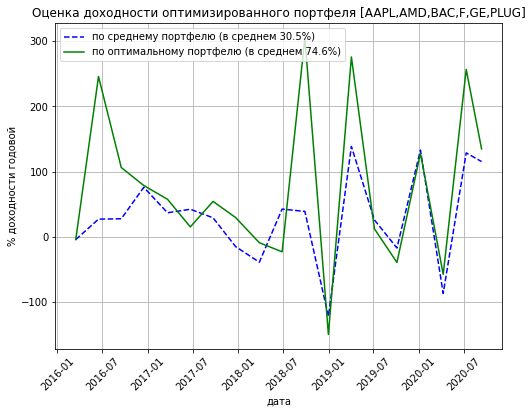

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Размер шага обучения (для расчета весов)
learnLen = 64

# Размер шага работы портфеля
workLen = 64

# Данные 
dClose = dCloseData.values

# Цикл по выборке
doh_optim = []
doh_mean = []
n = []
for nLearnStop in range(learnLen,dClose.shape[0],workLen):

    nLearnStart = nLearnStop - learnLen
    nWorkStart = nLearnStop
    nWorkStop = nWorkStart + workLen
    
    dCloseLearn = dClose[nLearnStart:nLearnStop]
    dCloseWork = dClose[nWorkStart:nWorkStop]
    
    # Средняя доходность
    dohLearn = dCloseLearn.mean(axis=0)
    dohWork = dCloseWork.mean(axis=0)

    # Ковариация
    cov =  np.cov(dCloseLearn,rowvar=False)

    # Расчет весов портфеля
    r_optim = portfOptim.portfSharpOptim(dohLearn,cov)

    # Расчет результата на следующем периоде
    doh_optim.append( portfOptim.dohPortf(r_optim,dohWork) * 100 * 252)
    doh_mean.append( np.mean(dohWork) * 100 * 252)
    n.append( dCloseData.index[min(nWorkStop,dClose.shape[0]-1)] )

plt.figure(figsize=(8,6))
plt.plot(n,doh_mean,'b--',label='по среднему портфелю (в среднем %1.1f%%)' % np.mean(doh_mean))
plt.plot(n,doh_optim,'g',label='по оптимальному портфелю (в среднем %1.1f%%)' % np.mean(doh_optim))
plt.legend()
plt.xlabel('дата')
plt.xticks(rotation=45)
plt.ylabel('% доходности годовой')
plt.title('Оценка доходности оптимизированного портфеля [' + ','.join(dCloseData.columns) + ']')
plt.grid()
plt.show()

# Выводы

